# Projeto 01: Reconhecimento de Dígitos

### João Victor Soares Silva | Mat: 20210027300
### Yhasmim de Souza Tigre | Mat: 20210026966 

## Pré-Processamento

In [1]:
from copy import copy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from Algoritmos import *

In [2]:
N = 28 #Número de linhas e colunas das matrizes das imagens
P_MAX = 255 #Número máximo de um pixel

In [3]:
# Aqui é só um exemplo menor de como funcionam as fórmulas da simetria no array.
# Acho bom usar pra estudar pra apresentação, então deixei aqui.

# teste = [
# 1, 2, 3, 4,
# 5, 6, 7, 8,
# 9, 10, 11, 12,
# 13, 14, 15, 16]

# lin = 4

# #Vertical
# print('Vertical')
# for i in range(lin):

#     for j in range(int(lin/2)):
#         print(f'{teste[(lin*i) + j]} + {teste[(lin*i) + (lin - j - 1)]} = {teste[(lin*i) + j] + teste[(lin*i) + (lin - j - 1)]}')

# #Horizontal
# print('\nHorizontal')
# for i in range(int(lin/2)):
    
#     for j in range(lin):
#         print(f'{teste[(lin*i) + j]} + {teste[(lin*(lin - i - 1)) + j]} = {teste[(lin*i) + j] + teste[(lin*(lin - i - 1)) + j]}')

In [3]:
def reduzir (nome : str, arq : str) -> None:
    aux = np.loadtxt (arq, delimiter = ';', dtype = str)
    aux = np.delete (aux, 0, 0) #Removendo a linha dos nomes das colunas
    lista_y = []
    lista_intensidade = []
    lista_simetria_vertical = []
    lista_simetria_horizontal = []
    lista_simetria = []

    for i in range (len(aux)): #Salvando as labels
        lista_y.append (int(aux[i][0]))
    
    aux = np.delete (aux, 0, 1) #Removendo as labels
    
    for i in range (len(aux)): #Calculando as intensidades
        soma = 0

        for j in range (len(aux[0])):
            soma += int(aux[i][j])
        
        lista_intensidade.append(soma/P_MAX)
    
    for imagem in aux: #Simetria vertical
        soma = 0

        for i in range(N):
            for j in range(int(N/2)):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[(N*i) + (N - j - 1)]))

        lista_simetria_vertical.append(soma/P_MAX)

    for imagem in aux: #Simetria horizontal
        soma = 0

        for i in range(int(N/2)):
            for j in range(N):
                soma += abs(int(imagem[(N*i) + j]) - int(imagem[N * (N - i - 1) + j]))

        lista_simetria_horizontal.append(soma/P_MAX)
    
    for i in range (len(aux)): #Somando as simetrias
        lista_simetria.append(lista_simetria_vertical[i] + lista_simetria_horizontal[i])

    #Criando e preenchendo o novo .csv
    dados_redux = open (f'{nome}.csv', 'w')

    dados_redux.write ('label;intensidade;simetria\n')
    for i in range (len(aux)):
        dados_redux.write (f'{lista_y[i]};{lista_intensidade[i]};{lista_simetria[i]}\n')
    
    dados_redux.close()

    return

In [4]:
def leitor_csv (arq : str) -> np.array:
    x = []
    y = []

    aux = np.loadtxt (arq, delimiter = ';', dtype = str)
    aux = np.delete (aux, 0, 0) #Removendo a linha dos nomes das colunas

    for linha in aux:
        x.append([float(linha[1]), float(linha[2])])
        y.append(int(linha[0]))
    
    return np.array(x), np.array(y)

In [6]:
#Reduzindo as dimensões:

reduzir(nome = 'train_redu', arq = 'train.csv')
reduzir(nome = 'test_redu', arq = 'test.csv')

In [5]:
#Separando as amostras:

X_train, y_train = leitor_csv (arq = "train_redu.csv")
X_test, y_test = leitor_csv (arq = "test_redu.csv")

## Funções Auxiliares

In [6]:
def mod_labels (X : np.array, Y : np.array, labels : list) -> np.array:
    if (len(labels) != 2):
        print("Selecione as duas labels que deverão ser classificadas.")

        return None

    novo_X = []
    novo_Y = []

    for i in range (len(Y)):
        if (Y[i] == labels[0]):
            novo_X.append(X[i])
            novo_Y.append(1)
        
        elif (Y[i] == labels[1]):
            novo_X.append(X[i])
            novo_Y.append(-1)
    
    return np.array(novo_X), np.array(novo_Y)

In [8]:
def plot_alg (w_lista : np.array) -> None:
    digitos_df = pd.read_csv("test_redu.csv", sep = ";")
    sns.set_theme()
    sns.jointplot(data = digitos_df, x = "intensidade", y = "simetria", hue = "label", palette = "Set2") 

    reta_lista = []
    for i in range (len(w_lista)):
        reta_lista.append(np.linspace(30, 180, 100))

    cor_lista = ['lightseagreen', 'cornflowerblue', 'mediumorchid']
    for w, c, r in zip (w_lista, cor_lista, reta_lista):
        plt.plot(r, (-w[0] - w[1]*r) / w[2], c = c)
    
    plt.ylim(30, 180)
    plt.xlim(30, 180)
    plt.show()

    return None

In [9]:
def plot_relatorio_eff (Y_pred : np.array, Y_real : np.array) -> None:
    print("Relatório de Eficácia:\n\n" + classification_report(y_true = Y_real, y_pred = Y_pred))

    #Matriz de Confusão
    mat_con = confusion_matrix (y_true = Y_real, y_pred = Y_pred)
    ax = sns.heatmap(mat_con, annot = True, fmt = 'd')

    ax.set_xlabel("Classificação Prevista", fontsize = 14, labelpad = 20)
    ax.xaxis.set_ticklabels(['Negativo', 'Positivo'])
    
    ax.set_ylabel("Classificação Real", fontsize = 14, labelpad = 20)
    ax.yaxis.set_ticklabels(['Negativo', 'Positivo'])
    
    ax.set_title("Matriz de Confusão", fontsize = 14, pad = 20)

    plt.show()

    return None

## Classificação dos Dígitos 1x5

In [12]:
#Instanciando:

X_train_1x5, y_train_1x5 = mod_labels (X = X_train, Y = y_train, labels = [1, 5])
X_test_1x5, y_test_1x5 = mod_labels (X = X_test, Y = y_test, labels = [1, 5])

### Perceptron Learning Algorithm (PLA)

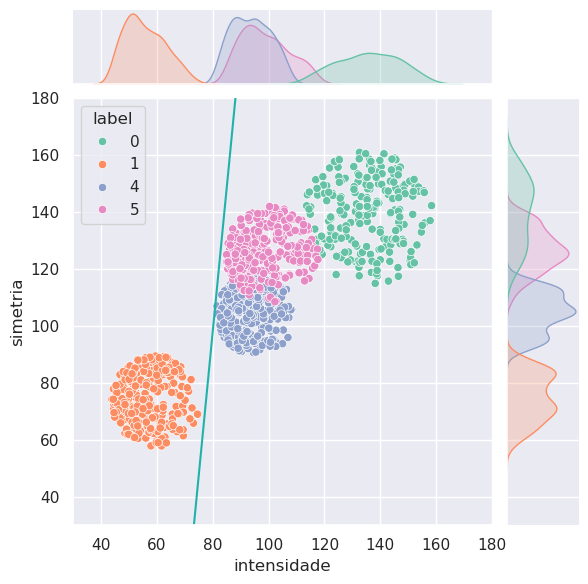

In [35]:
#Instanciando o objeto:
PLA_1x5 = PLA (n_int = 20000)

#Treinando:
PLA_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
PLA_w_1x5 = PLA_1x5.get_w()

#Observando no gráfico:
plot_alg (w_lista = [PLA_w_1x5])

### Relatório de Eficácia - PLA

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



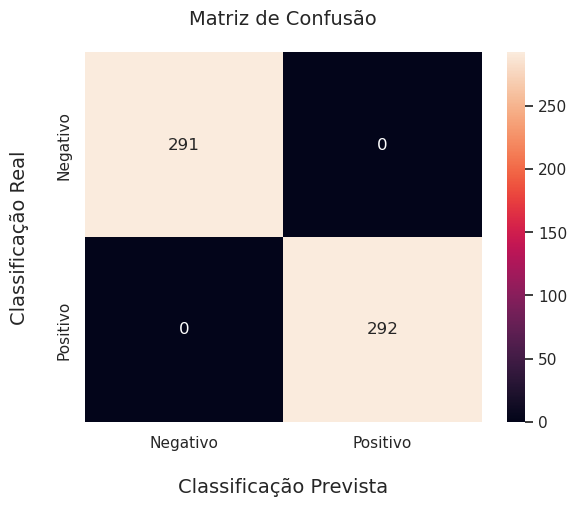

In [36]:
plot_relatorio_eff (Y_pred = PLA_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Regressão Linear

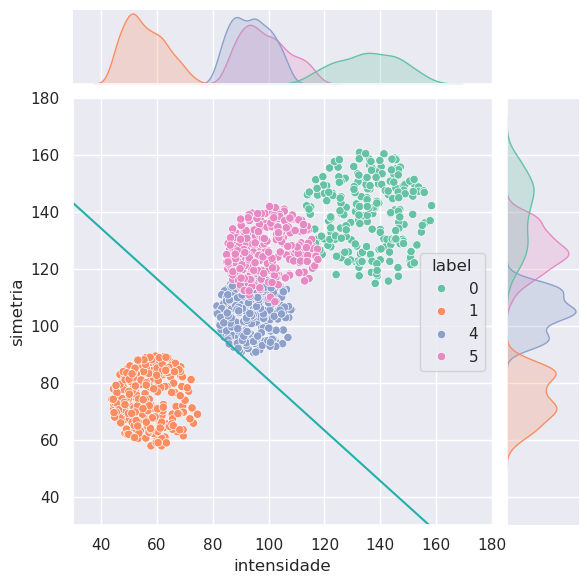

In [37]:
#Instanciando o objeto:
Rlin_1x5 = Reg_Lin ()

#Treinando:
Rlin_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
Rlin_w_1x5 = Rlin_1x5.get_w()

#Observando no gráfico: 
plot_alg (w_lista = [Rlin_w_1x5])

### Relatório de Eficácia - R. Linear

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



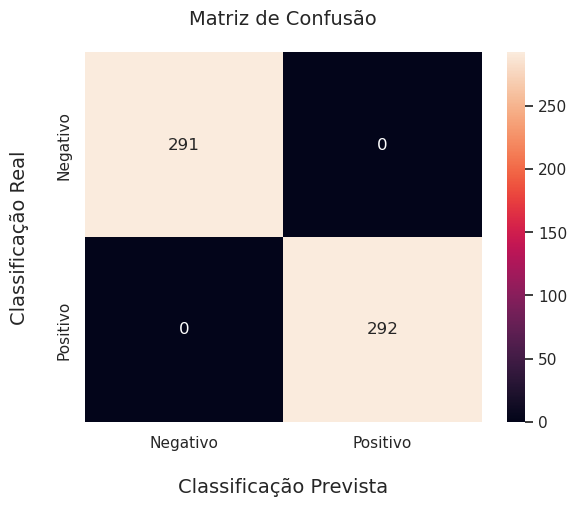

In [38]:
plot_relatorio_eff (Y_pred = Rlin_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

### Regressão Logística

/home/joao/Documentos/UFPB/P5/AM/Projeto_1/Algoritmos.py:160: RuntimeWarning: overflow encountered in exp
  vsoma += (yn * xn) / (1 + np.exp(aux, dtype = "float64"))


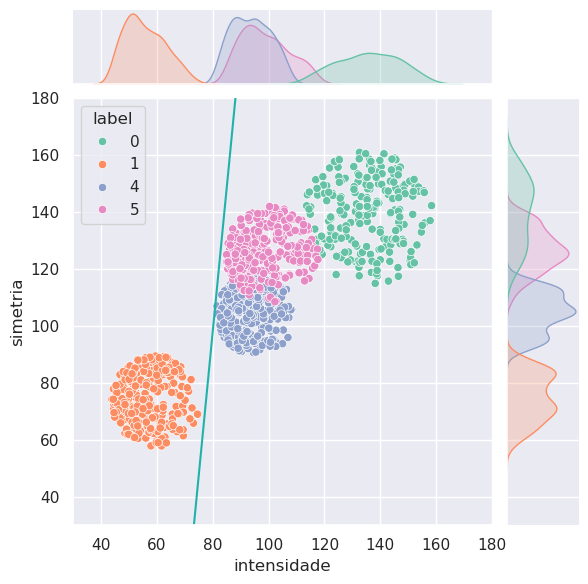

In [39]:
#Instanciando o objeto:
Rlog_1x5 = Reg_Log (n_int = 60000, tam_batch = 350)

#Treinando:
Rlog_1x5.fit(X = X_train_1x5, Y = y_train_1x5)

#Obtendo os pesos:
Rlog_w_1x5 = PLA_1x5.get_w()

#Observando no gráfico:
plot_alg (w_lista = [Rlog_w_1x5])

### Relatório de Eficácia - R. Logística

Relatório de Eficácia:

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



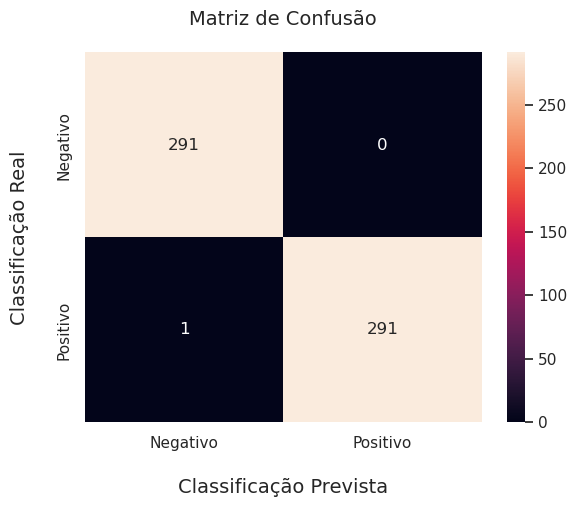

In [40]:
plot_relatorio_eff (Y_pred = Rlog_1x5.predict(X = X_test_1x5), Y_real = y_test_1x5)

## Classificação de Dígitos Completo

In [21]:
class UmVSTodos ():
    def __init__ (self, ordem : list, n_int : int = 1000, modelo = None) -> None:
        self.modelo = modelo(n_int = n_int)
        self.ordem = ordem
    
    def acuracia (self, X : np.array, Y : np.array) -> float:
        soma_PCC = 0
        y_predict = self.predict(X = X)

        for y_pred, y_real in zip (y_predict, Y):
            if (y_pred == y_real):
                soma_PCC += 1
        
        return (soma_PCC/len(X))
        
    def fit (self, X : np.array, Y : np.array) -> None:
        novo_X = X
        novo_Y = Y
        fila = copy(self.ordem)
        self.w_lista = []

        while (len(fila) > 1):
            Y_temp = []
            index_lista = []

            #Adequando as labels
            for i in range(len(novo_Y)):
                if (novo_Y[i] == fila[0]):
                    Y_temp.append(1)
                    index_lista.append(i)
                
                else:
                    Y_temp.append(-1)
            
            #Treinando os pesos de acordo com o modelo
            self.modelo.fit(X = novo_X, Y = Y_temp)
            self.w_lista.append(self.modelo.get_w())

            #Atualizando as listas, removendo as labels já treinadas
            novo_X = np.delete (novo_X, index_lista, axis = 0)
            novo_Y = np.delete (novo_Y, index_lista)
            fila.remove(fila[0])

        return

    def predict (self, X : np.array) -> np.array:
        n_class = len(self.w_lista)
        tam = len(X)
        y_predict = np.zeros(tam, dtype = float)

        for i in range (n_class):
            self.modelo.set_w (novo_w = self.w_lista[i])
            y_temp = self.modelo.predict(X = X)

            for j in range (len(y_temp)):
                if (y_temp[j] == 1):
                    y_predict[j] = self.ordem[i]
                
        for k in range (tam):
            if (y_temp[k] == 0):
                y_predict[k] = self.ordem[-1]
        
        return y_predict
    
    def get_w (self) -> np.array:
        try:
            return self.w_lista
        
        except:
            print("Não foi possível recuperar w. Por favor, se certifique de treinar o modelo antes.\n")

In [19]:
class OneVsAllClassifier:

    def __init__(self, model=None, digits=None, iterations=None):
        self.model = model
        self.digits = digits
        self.weights = []
        self.iterations = iterations

    def fit(self, X_train, y_train):
        X = X_train.copy()
        y = y_train.copy()

        for i, digit in enumerate(self.digits[:-1]):
            if i == 0:
                y_i = np.where(y == digit, 1, -1)
                if self.iterations is None:
                    self.model.fit(X, y_i)
                else:
                    self.model.fit(X, y_i, iterations=self.iterations[i])
                self.weights.append(self.model.get_weights())
                previous_digit = digit
            else:
                X = np.delete(X, np.where(y == previous_digit), axis=0)
                y = np.delete(y, np.where(y == previous_digit))
                y_i = np.where(y == digit, 1, -1)
                if self.iterations is None:
                    self.model.fit(X, y_i)
                else:
                    self.model.fit(X, y_i, iterations=self.iterations[i])
                self.weights.append(self.model.get_weights())
                previous_digit = digit

    def predict(self, X):
        predictions = []
        for i, x in enumerate(X):
            for j, digit in enumerate(self.digits[:-1]):
                if np.sign(np.dot(self.weights[j], x)) == 1:
                    predictions.append(digit)
                    break
            if len(predictions) < i + 1:
                predictions.append(self.digits[-1])
        return np.array(predictions)

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

    def save_w(self, file='best_weights.csv'):
        weights_df = pd.read_csv(file)
        new_row = {
            "weights_0": self.weights[0],
            "weights_1": self.weights[1],
            "weights_2": self.weights[2],
            "digits": self.digits,
            "model_info": str(self.model)
        }
        weights_df = weights_df.append(new_row, ignore_index=True)
        weights_df.to_csv(file, index=False)

    def load_weights(self, file='best_weights.csv', index=0):
        weights_df = pd.read_csv(file)
        row = weights_df.iloc[index, :]

        weights_0 = [float(w) for w in row['weights_0'][1:-1].strip().split(" ") if w != '']
        weights_1 = [float(w) for w in row['weights_1'][1:-1].strip().split(" ") if w != '']
        weights_2 = [float(w) for w in row['weights_2'][1:-1].strip().split(" ") if w != '']
        self.weights = np.array([weights_0, weights_1, weights_2])
        self.digits = [int(digit) for digit in row['digits'][1:-1].split(", ")]

### Perceptron Learning Algorithm (PLA)

In [16]:
import random 
class PLAS:

    def __init__(self, iterations=1000, n_min=50, n_max=200):
        self.iterations = iterations
        self.n_min = n_min #número mínimo de pontos para o treinamento
        self.n_max = n_max


    def fit(self, X, y, iterations=None):
        X = np.array(X)
        y = np.array(y)

        self.w = np.zeros(X.shape[1])

        for j in (range(self.iterations)):
            n = random.randint(self.n_min, self.n_max)
            indexes = np.random.randint(len(X) - 1, size=n)
            X_ = X[indexes]
            y_ = y[indexes]

            for i in range(n):
                while len(self.constroi_listaPCI(X_, y_, self.w)[0]) != 0:
                    PCI, PCI_y = self.constroi_listaPCI(X_, y_, self.w)
                    index = random.randint(0, len(PCI) - 1)
                    self.w = self.w + PCI[index] * PCI_y[index]
                    break


        self.w = self.w

    def constroi_listaPCI(self, X, y, w):
        X = np.array(X)
        y = np.array(y)
        w = np.array(w)
        condition = np.sign(X.dot(w)) != y
        PCI = X[condition]
        PCI_y = y[condition]
        return PCI, PCI_y
    
    def get_weights(self):
        return self.w

    def set_w(self, w):
        self.w = w

    def h(self, x):
        return np.sign(np.dot(self.w, x))

    def error_in(self, X, y):
        return np.mean(np.sign(np.dot(self.w, X.T)) != y)

    def predict(self, X):
        return [self.h(x) for x in X]

In [19]:
# Determinando o PLA
pla_oneall= PLAS()

# Base de dígitos que serão usados no modelo
labels = [0, 1, 4, 5]

# Criando e treinando o modelo
model = OneVsAllClassifier(pla_oneall, labels)
model.fit(X_train, y_train)

# Pesos para criar os plots
pla_oneall_pesos = model.get_weights()

# Predição com a base de teste
y_pred_pla_oneall = model.predict(X_test) 

In [26]:
def plot_alldigits(df, digits_list, title, ax=None, W=[]):

    colors = ['black', 'red', 'gray', 'blue']

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        fig = ax.get_figure()

    sns.set_style("darkgrid")
    sns.scatterplot(x='intensidade', y='simetria', hue='label', 
                data=df, palette=['black', 'orange', 'gray', 'blue'],
                marker='o', s=30, ax=ax)

    ax.set_xlabel('Intensidade', fontsize=14, fontweight='bold')
    ax.set_ylabel('Simetria', fontsize=14, fontweight='bold')
    ax.set_title(title, fontsize=16, fontweight='bold')

    ax.set_xlim([40, 200])
    ax.set_ylim([40, 200])

    if len(W) > 0:
        linestyles = ['dashed', 'dotted', 'dashdot', 'dotted']
        colors_w = ['purple', 'red', 'brown']
        for i, w in enumerate(W):
            x_values = np.array([df.intensidade.min(), df.intensidade.max()])
            y_values = calculate_y(x_values, w)
            ax.plot(x_values, y_values,
                    color=colors_w[i],
                    linestyle=linestyles[i],
                    label=f'Reta {digits_list[i]}x{digits_list[i+1:len(w)+1]}')

    return ax

def calculate_y(x, w):
    return -(w[0] + w[1] * x) / w[2]

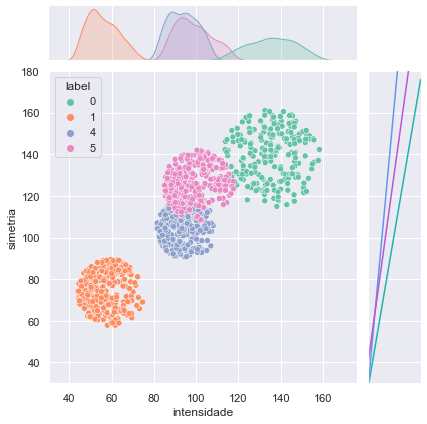

In [27]:
#Instanciando o objeto:
PLA_1vTodos = UmVSTodos (ordem = [0, 1, 4, 5], n_int = 20000, modelo = PLA)

#Treinando:
PLA_1vTodos.fit(X = X_train, Y = y_train)

#Obtendo os pesos:
PLA_w_1vTodos = PLA_1vTodos.get_w()

#Observando no gráfico:
plot_alg (w_lista = PLA_w_1vTodos)

### Relatório de Eficácia - PLA

c:\Users\Yhasmim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yhasmim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Yhasmim\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Relatório de Eficácia:

              precision    recall  f1-score   support

           0       0.05      0.06      0.05       218
           1       0.96      0.58      0.72       292
           4       0.41      0.86      0.56       314
           5       0.00      0.00      0.00       291

    accuracy                           0.41      1115
   macro avg       0.35      0.38      0.33      1115
weighted avg       0.38      0.41      0.36      1115



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (2).

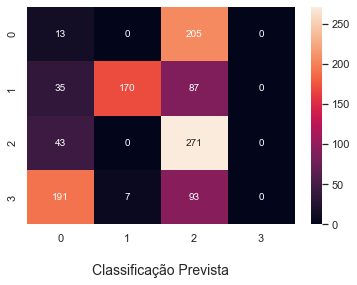

In [28]:
plot_relatorio_eff (Y_pred = PLA_1vTodos.predict(X = X_test), Y_real = y_test)

### Regressão Linear

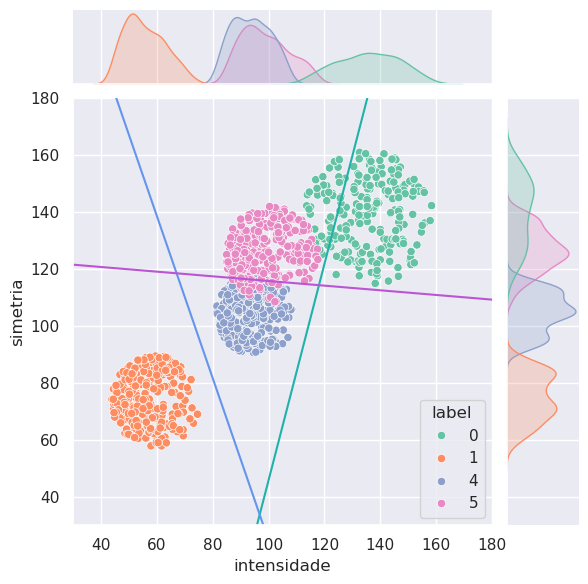

In [39]:
#Instanciando o objeto:
Rlin_1vTodos = UmVSTodos (ordem = [0, 1, 4, 5], n_int = 20000, modelo = Reg_Lin)

#Treinando:
Rlin_1vTodos.fit(X = X_train, Y = y_train)

#Obtendo os pesos:
Rlin_w_1vTodos = Rlin_1vTodos.get_w()

#Observando no gráfico:
plot_alg (w_lista = Rlin_w_1vTodos)

### Relatório de Eficácia - R. Linear

In [40]:
# plot_relatorio_eff (Y_pred = Rlin_1vTodos.predict(X = X_test), Y_real = y_test)
Rlin_1vTodos.acuracia(X = X_test, Y = y_test)

[ 1.  1.  1. ... -1. -1. -1.]
[-1. -1. -1. ... -1. -1. -1.]
[-1. -1. -1. ... -1. -1. -1.]


0.46995515695067264

### Regressão Logística

In [24]:
#Instanciando o objeto:
Rlog_1vTodos = UmVSTodos (ordem = [0, 1, 4, 5], n_int = 20000, modelo = Reg_Log)

#Treinando:
Rlog_1vTodos.fit(X = X_train, Y = y_train)

#Obtendo os pesos:
Rlog_w_1vTodos = Rlog_1vTodos.get_w()

#Observando no gráfico:
plot_alg (w_lista = Rlog_w_1vTodos)

NameError: name 'UmVSTodos' is not defined

### Relatório de Eficácia - R. Logística

In [ ]:
plot_relatorio_eff (Y_pred = Rlog_1vTodos.predict(X = X_test), Y_real = y_test)

## Implementações Avançadas

### Weight-Decay para a Regressão Logística

In [22]:
"""regularização para evitar overfitting"""

class weight_decay():
    
    def fit(self, x, y, eval = False):
        #definir treino e eval
        X_train, X_eval, y_train, y_eval = train_test_split(x, y, test_size=0.2, random_state=42)

        #receber a regreção logística      
        log_reg = Reg_Log (n_int = 60000, tam_batch = 350)
        #valore de lambda
        param_grid = [{'C': np.logspace(-5, 5, 10)}]
        
        #executar o grid search para encontrar o melhor valor de lambda
        grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=5)

        grid_search.fit(X_train, y_train)
        best_model_train = grid_search.best_estimator_
        
        # Salvando os pesos do melhor modelo
        self.w = best_model_train.coef_[0]

        if eval == True:
            grid_search.fit(X_eval, y_eval)
            best_model_eval = grid_search.best_estimator_

            # Avaliar o modelo nos dados de avaliação
            eval_score = best_model_eval.score(X_eval, y_eval)
            print("Precisão nos dados de teste:", eval_score)

        # Imprimir os melhores parâmetros e a precisão do modelo
        print("Melhor parâmetro lambda (C):", grid_search.best_params_)
        print("Precisão do modelo:", grid_search.best_score_)

        # Avaliar o modelo nos dados de treino
        train_score = grid_search.score(X_train, y_test)
        print("Precisão nos dados de teste:", train_score)

    def getW(self):
        return self.w

In [23]:
weight_decay = weight_decay().fit(X_train, y_train, eval = True)

TypeError: Cannot clone object '<Algoritmos.Reg_Log object at 0x000001D7C73735E0>' (type <class 'Algoritmos.Reg_Log'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [6]:
from Algoritmos import Reg_Log
import warnings
warnings.filterwarnings("error")

class WeightDecay:

    # Executa a heuristica Weigth Decay
    def fit(self, X, y):
        training_x, testing_x, training_y, testing_y = train_test_split(X, y, test_size=0.2, random_state=2698)
        
        new_training_x = [0 for i in range(len(training_x))]
        for i in range(len(training_x)):
            new_training_x[i] = np.array([1, training_x[i][0], training_x[i][1]])

        
        lambdas = sorted([10 ** x for x in range(-5, 5)])
        lambdas.append(0)
        bestEout = 100

        self.classifier = None  # Inicializa self.classifier como None
        for lam in lambdas:
            classifier = Reg_Log()
            try:
                classifier.fit(training_x, training_y)
            except RuntimeWarning:
                continue
            
            #calcula o erro quadrático (Eout)
            eOut = self.getEout(classifier.predict(classifier.w_lista, new_training_x), testing_y)                
            
            print("LA: " + str(classifier.lam) + "  Eval = " + str(eOut))
            if eOut < bestEout:
                bestEout = eOut
                self.classifier = classifier

        if self.classifier is not None:  # Verifica se self.classifier foi definido           
            self.w_lista = self.classifier.w_lista
            print("Best Lamb: " + str(self.classifier.lam))
        else:
            print("Nenhum classificador válido encontrado.")

    def predict_prob(self, X):
        return 1 / (1 + np.exp(-(self.w_lista[0] + np.dot(self.w_lista[1:], X.T))))

    def predict(self, X):
        return np.where(self.predict_prob(X) >= 0.5, 1, -1)

    def getW(self):
        return self.w_lista
    
    def getEout(self, predicted_y_test, testing_y):
        #Calcula o erro quadrático (Eout)
        N_val = len(testing_y)
        eOut = 0
        for i in range(N_val):
            if(predicted_y_test[i] != testing_y[i]):
                eOut += 1 
        eOut /= N_val
        return eOut

In [ ]:
        resultado = np.dot(X, w)
        resultado = np.sign(resultado)

In [103]:
#Weigth Decay heuristic
classifier = WeightDecay()
classifier.fit(X_train, y_train)  # Ajuste do modelo

lrY = [+1 if value == 1 else -1 for value in y_train]
lr_y_test = [+1 if value == 1 else -1 for value in y_test]

def error(pred, y):
    N = len(y)
    error = 0
    for i in range(N):
        if(pred[i] != y[i]):
          error += 1
    error /= N
    return error

#Computando o erro dentro da amostra (Ein)
pred = classifier.predict(X_train)
print("\nEin = " + str(error(pred, lrY)))

#Computando o erro dentro da amostra (Eout)
pred = classifier.predict(X_train)
print("Eout = " + str(error(pred, lr_y_test)))

#Métricas de aprendizado
pred = classifier.predict(X_test)
print(classification_report(lr_y_test, pred))

Nenhum classificador válido encontrado.


AttributeError: 'WeightDecay' object has no attribute 'w_lista'

In [23]:
class WeightDecay:
    # Infere o vetor w da funçao hipotese
    # Executa a heuristica Weigth Decay
    def fit(self, dados, X, y):
        training_x, testing_x, training_y, testing_y = train_test_split(X, y, test_size=0.2, random_state=2698)
        
        # Tive que colocar o um aqui no x pq ele vai usar aqui dentro da função
        new_training_x = [0 for i in range(len(training_x))]
        for i in range(len(training_x)):
            new_training_x[i] = np.array([1, training_x[i][0], training_x[i][1]])

        
        lambdas = sorted([10 ** x for x in range(-5, 5)])
        #print(lambdas)
        lambdas.append(0)
        bestEout = 100
 
        for lam in lambdas:
            classifier = Reg_Log()
            try:
                classifier.fit(dados, training_x, training_y)
            except RuntimeWarning:
                continue

            #Computando o erro quadrático (Eout)
            eOut = self.getEout(classifier.predict(classifier.w, new_training_x), testing_y)                
            
            #print("LA: " + str(classifier.lam) + "  Eval = " + str(eOut))
            if eOut < bestEout:
                bestEout = eOut
                self.classifier = classifier
                    
        self.w = self.classifier.w
        #print("Best Lamb: " + str(self.classifier.lam))
        
    #Predicao por classificação linear
    def predict(self, w, X):
        resultado = np.dot(X, w)
        resultado = np.sign(resultado)
        return resultado

    def getW(self):
        return self.w
    
    def getEout(self, predicted_y_test, testing_y):
        #Computando o erro quadrático (Eout)
        N_val = len(testing_y)
        eOut = 0
        for i in range(N_val):
            if(predicted_y_test[i] != testing_y[i]):
                eOut += 1 
        eOut /= N_val
        return eOut

In [24]:
def treino(self, method = 'pla', max_iter = 10000, verbose=False, plot=False):
    if verbose:
        print(f'Separando na ordem {self.lista}')
    while len(self.lista_copy)>=2:
        self.preparaDados(type="train", binary_classif=True)
        if verbose and (method != 'logreg' or method != 'weightdecay'):
            print(f'\nSeparando o dígito {self.lista_copy[0]} dos demais:')

        if method == 'weightdecay':
            wd = WeightDecay()
            wd.fit(self.modelo_xy, self.modelo_x, self.modelo_y)
            self.predicted_y_modelo = wd.predict(wd.w, self.new_modelo_x)
            self.retas_weightdecay.append(wd.w)

In [25]:
pla_oneall= PLAS()

# Base de dígitos que serão usados no modelo
labels = [0, 1, 4, 5]

# Criando e treinando o modelo
model = UmVSTodos(pla_oneall, labels)
weightDecay_todos = model(X_train, X_test, lista = ['0', '1', '4', '5'])
weightDecay_todos.treino(method='weightdecay', verbose=True, plot=True)

TypeError: 'NoneType' object is not callable

### Definindo a Melhor Ordem

In [41]:
from itertools import permutations

def calculaMelhorOrdem(method = 'pla', ordem = [0, 1, 4, 5], max_iter = 100):
    lista_permutada = [list(x) for x in permutations(ordem)]
    lista_geral = []

    for l in lista_permutada:
        lista_temp = []
        C = UmVSTodos(ordem = [0, 1, 4, 5], n_int = 20000, modelo = Reg_Log)

        C.treino(method, max_iter)
        C.teste(method)
        lista_temp.append(l)
        lista_temp.append(C.Ein)
        lista_temp.append(C.Eout)
        lista_geral.append(lista_temp)

    lista_geral.sort(key=lambda x: x[1])
    print(f'O arranjo de menor Ein é {lista_geral[0][0]}, com Ein = {lista_geral[0][1]:.4f}')
    print('Top 5 arranjos de menor Ein:')
    for i in range(5):
        print(f'     {i+1}º: {lista_geral[i][0]}, com Ein = {lista_geral[i][1]:.4f}, Eout = {lista_geral[i][2]:.4f}')

    lista_geral.sort(key=lambda x: x[2])
    print(f'\nO arranjo de menor Eout é {lista_geral[0][0]}, com Eout = {lista_geral[0][2]:.4f}')
    print('Top 5 arranjos de menor Eout:')
    for i in range(5):
        print(f'     {i+1}º: {lista_geral[i][0]}, com Ein = {lista_geral[i][1]:.4f}, Eout = {lista_geral[i][2]:.4f}')

    lista_geral.sort(key=lambda x: abs(x[1] - x[2]))
    print(f'\nO arranjo de menor diferença entre Ein e Eout é {lista_geral[0][0]}, com Ein = {lista_geral[0][1]:.4f}, Eout = {lista_geral[0][2]:.4f} e diferença = {abs(lista_geral[0][1] - lista_geral[0][2]):.4f}')
    print('Top 5 arranjos de menor diferença entre Ein e Eout:')
    for i in range(5):
        print(f'     {i+1}º: {lista_geral[i][0]}, com Ein = {lista_geral[i][1]:.4f}, Eout = {lista_geral[i][2]:.4f} e diferença = {abs(lista_geral[i][1] - lista_geral[i][2]):.4f}')

In [42]:
calculaMelhorOrdem(X_train, X_test, method = 'pla', ordem = [0, 1, 4, 5], max_iter = 100)

TypeError: calculaMelhorOrdem() got multiple values for argument 'method'